In [11]:
import geopandas as gpd

# Load the GeoJSON files
files = {
    "tourism": "../data/geojson/atractivos_turisticos.geojson",
    "human_dev_index": "../data/geojson/indice_desarrollo_humano.geojson",
    "multidim_index": "../data/geojson/indice_multidimensional_c.geojson",
    "poverty_index": "../data/geojson/indice_pobreza_multidimen.geojson",
    "public_transport": "../data/geojson/paradas_de_transporte_pub.geojson",
    "unemployment_rate": "../data/geojson/tasa_de_desempleo.geojson",
    "green_zones": "../data/geojson/inventario_zonas_verdes.geojson"
}

# Read files into GeoDataFrames
gdfs = {key: gpd.read_file(path) for key, path in files.items()}

# Inspect the structure of each dataset
file_summaries = {key: gdf.head(3) for key, gdf in gdfs.items()}
file_info = {key: gdf.info() for key, gdf in gdfs.items()}

file_summaries

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             92 non-null     int32   
 1   imperdible           92 non-null     object  
 2   cod_comuna           92 non-null     object  
 3   cod                  92 non-null     object  
 4   nombre_sitio         92 non-null     object  
 5   tipo_atractivo       92 non-null     object  
 6   orden_visualizacion  92 non-null     int32   
 7   direccion            92 non-null     object  
 8   sitio_web            92 non-null     object  
 9   nombre_comuna        92 non-null     object  
 10  cod_barrio           92 non-null     object  
 11  barrio               92 non-null     object  
 12  x_origen_nacional    92 non-null     float64 
 13  y_origen_nacional    92 non-null     float64 
 14  latitud              92 non-null     float64 
 15  longitud         

{'tourism':    OBJECTID imperdible cod_comuna    cod                      nombre_sitio  \
 0         1         NO         15  AT001   Aeroparque Parque Juan Pablo II   
 1         2         NO         15  AT002  Aeropuerto Enrique Olaya Herrera   
 2         3         NO         10  AT003                      Barrio Prado   
 
                      tipo_atractivo  orden_visualizacion  \
 0      Parque temático y recreativo                   14   
 1           Aeropuerto de pasajeros                   37   
 2  Sector urbano o rural de interés                    0   
 
               direccion                            sitio_web  nombre_comuna  \
 0     CR 70 No. 16 - 04  https://aeroparquejuanpablo.gov.co/       Guayabal   
 1  CR 65 A No. 13 - 157   https://www.aeropuertomedellin.co/       Guayabal   
 2       CR 50 No. 62-99                                       La Candelaria   
 
   cod_barrio                barrio  x_origen_nacional  y_origen_nacional  \
 0    Inst_19  Parque Juan

In [12]:
# Analyze tourism data: spatial distribution and attributes
tourism_data = gdfs["tourism"]

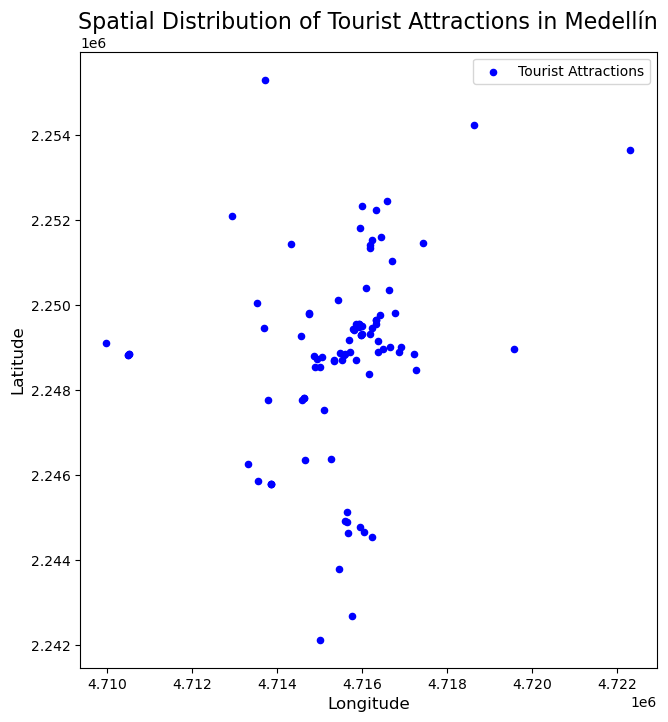

In [4]:
import matplotlib.pyplot as plt

# Plot the spatial distribution of tourist attractions
fig, ax = plt.subplots(figsize=(12, 8))
tourism_data.plot(ax=ax, color='blue', markersize=20, label='Tourist Attractions')

# Title and labels
ax.set_title("Spatial Distribution of Tourist Attractions in Medellín", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()

plt.show()

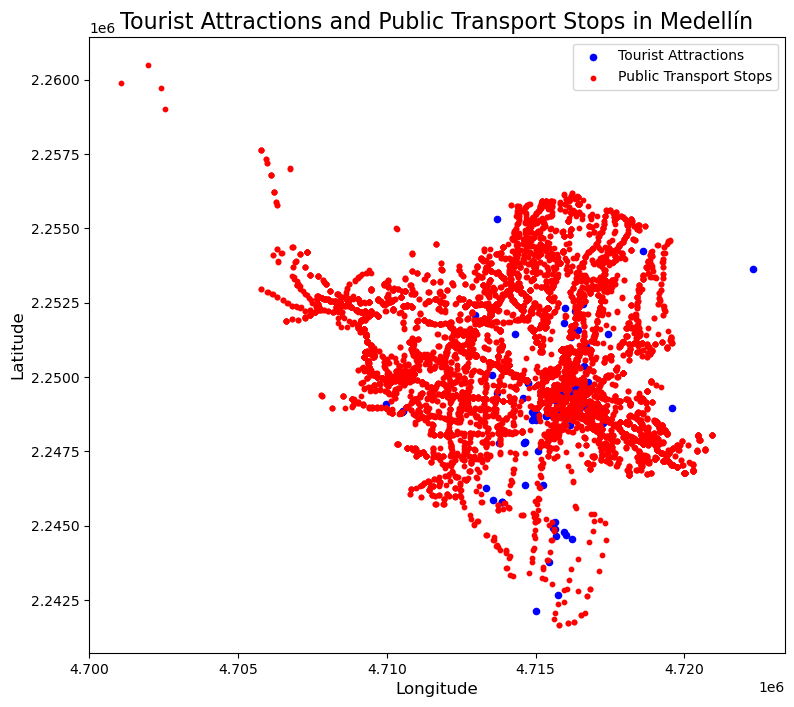

In [5]:
# Overlay public transport stops on the tourism map
public_transport_data = gdfs["public_transport"]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot tourist attractions
tourism_data.plot(ax=ax, color='blue', markersize=20, label='Tourist Attractions')

# Plot public transport stops
public_transport_data.plot(ax=ax, color='red', markersize=10, label='Public Transport Stops')

# Title and labels
ax.set_title("Tourist Attractions and Public Transport Stops in Medellín", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()

plt.show()


In [ ]:
from shapely.ops import nearest_points

# Function to calculate nearest distance from points in one GeoDataFrame to another
def calculate_nearest_distance(src_gdf, dest_gdf):
    # Ensure both GeoDataFrames have the same CRS
    src_gdf = src_gdf.to_crs(epsg=4326)
    dest_gdf = dest_gdf.to_crs(epsg=4326)
    
    # Calculate nearest distance
    distances = src_gdf.geometry.apply(
        lambda geom: dest_gdf.distance(geom).min()
    )
    return distances

# Calculate distance from each tourist attraction to the nearest public transport stop
tourism_data["distance_to_transport"] = calculate_nearest_distance(tourism_data, public_transport_data)

C:\Users\luism\AppData\Local\Temp\ipykernel_25404\51981156.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda geom: dest_gdf.distance(geom).min()


,nombre_sitio,distance_to_transport
0,Aeroparque Parque Juan Pablo II,0.002091
1,Aeropuerto Enrique Olaya Herrera,0.002206
2,Barrio Prado,0.001480
3,Basílica Menor Nuestra Señora de la Candelaria,0.000441
4,Bulevar Libertadores de América,0.000655


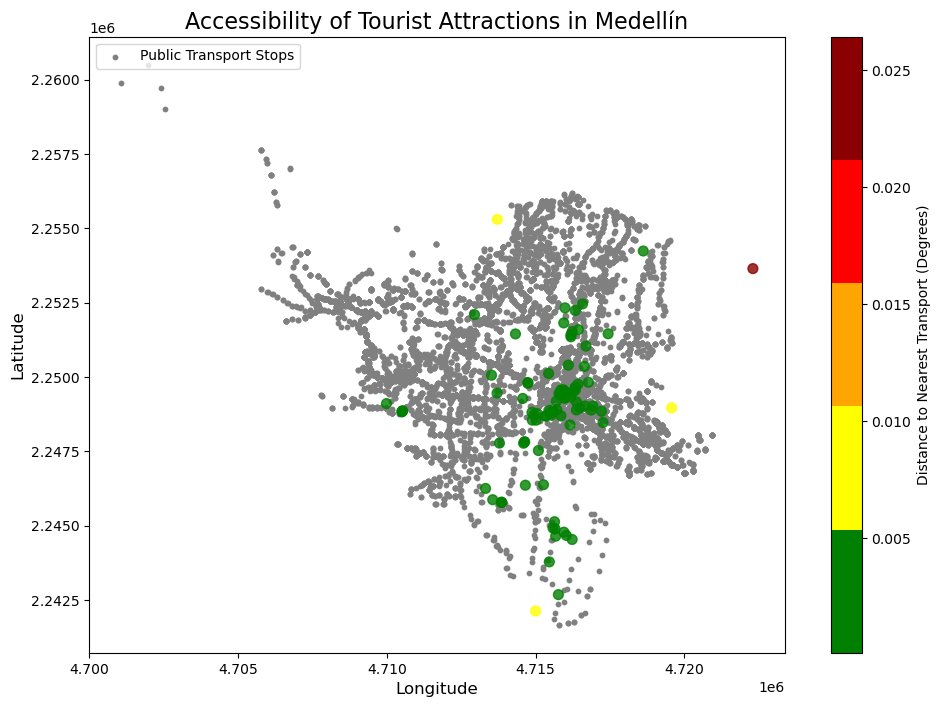

In [7]:
import matplotlib.colors as mcolors

# Define color mapping for distances
distance_bins = [0, 0.001, 0.005, 0.01, 0.02, 0.05]
colors = ['green', 'yellow', 'orange', 'red', 'darkred']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(distance_bins, cmap.N)

# Plot the combined map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot public transport stops
public_transport_data.plot(ax=ax, color='grey', markersize=10, label='Public Transport Stops')

# Plot tourist attractions with color based on distance
tourism_data.plot(
    ax=ax,
    column='distance_to_transport',
    cmap=cmap,
    legend=True,
    legend_kwds={'label': "Distance to Nearest Transport (Degrees)"},
    markersize=50,
    alpha=0.8
)

# Title and labels
ax.set_title("Accessibility of Tourist Attractions in Medellín", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend(loc="upper left")

plt.show()


C:\Users\luism\AppData\Local\Temp\ipykernel_25404\869252132.py:13: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
C:\Users\luism\AppData\Local\Temp\ipykernel_25404\869252132.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


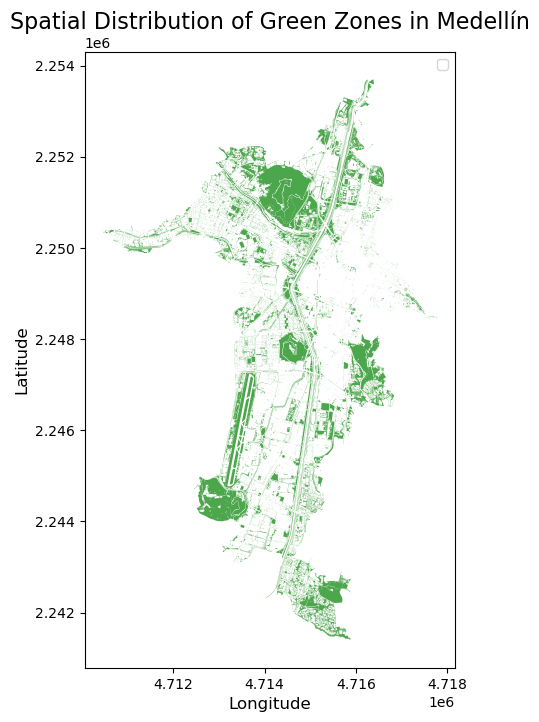

In [15]:
green_zones_data = gdfs["green_zones"] 

fig, ax = plt.subplots(figsize=(12, 8))

# Plot green zones
green_zones_data.plot(ax=ax, color='green', alpha=0.7, label='Green Zones')


# Title and labels
ax.set_title("Spatial Distribution of Green Zones in Medellín", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend()

plt.show()


C:\Users\luism\AppData\Local\Temp\ipykernel_25404\1555083644.py:36: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper left")
C:\Users\luism\AppData\Local\Temp\ipykernel_25404\1555083644.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper left")


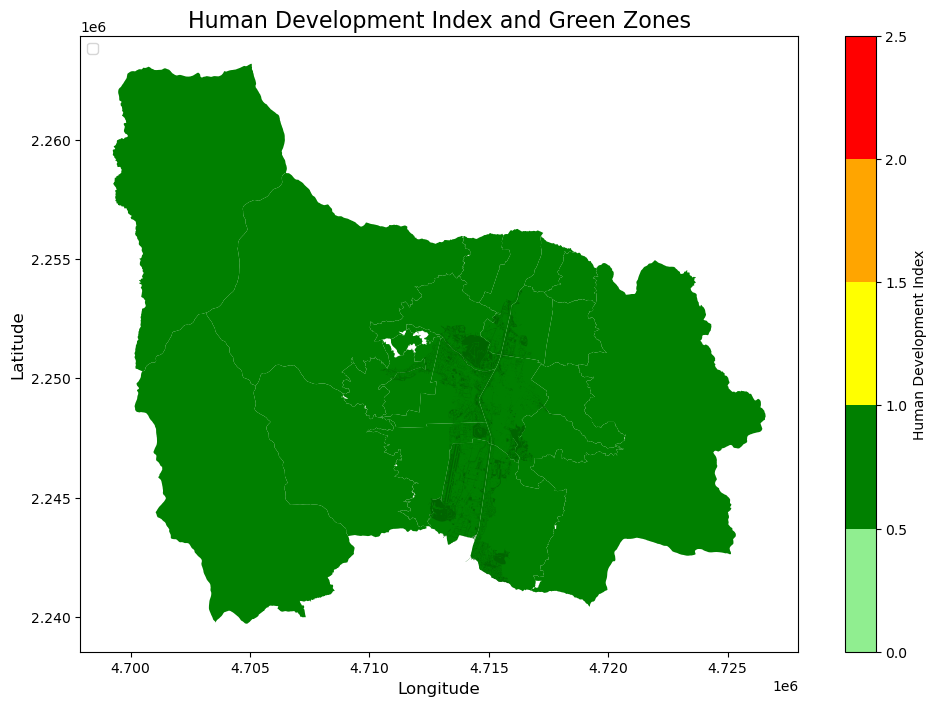

C:\Users\luism\AppData\Local\Temp\ipykernel_25404\1555083644.py:47: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper left")
C:\Users\luism\AppData\Local\Temp\ipykernel_25404\1555083644.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper left")


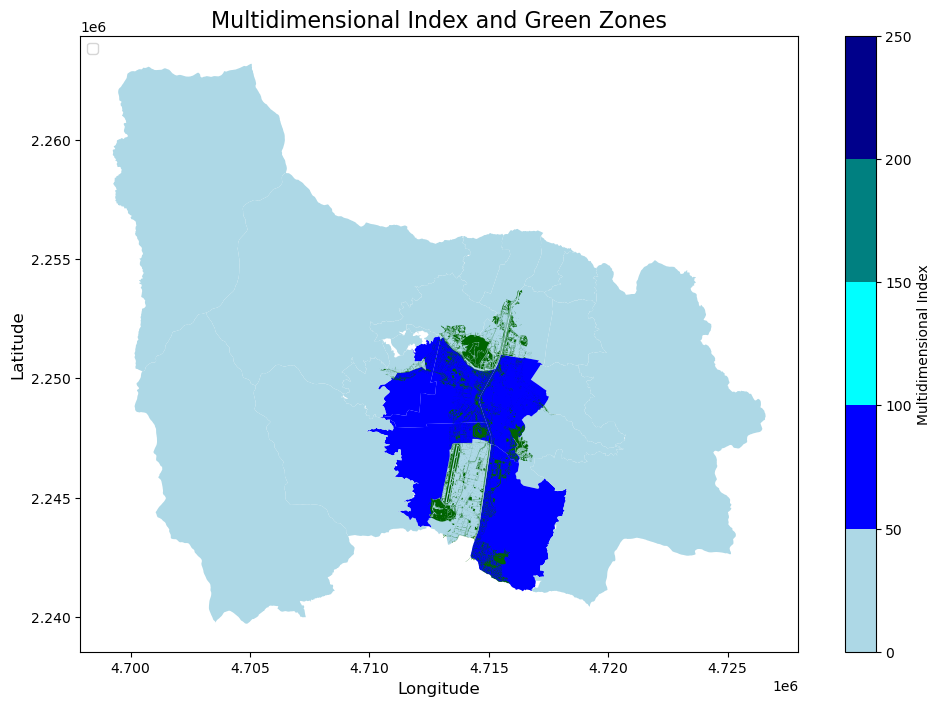

C:\Users\luism\AppData\Local\Temp\ipykernel_25404\1555083644.py:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper left")
C:\Users\luism\AppData\Local\Temp\ipykernel_25404\1555083644.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper left")


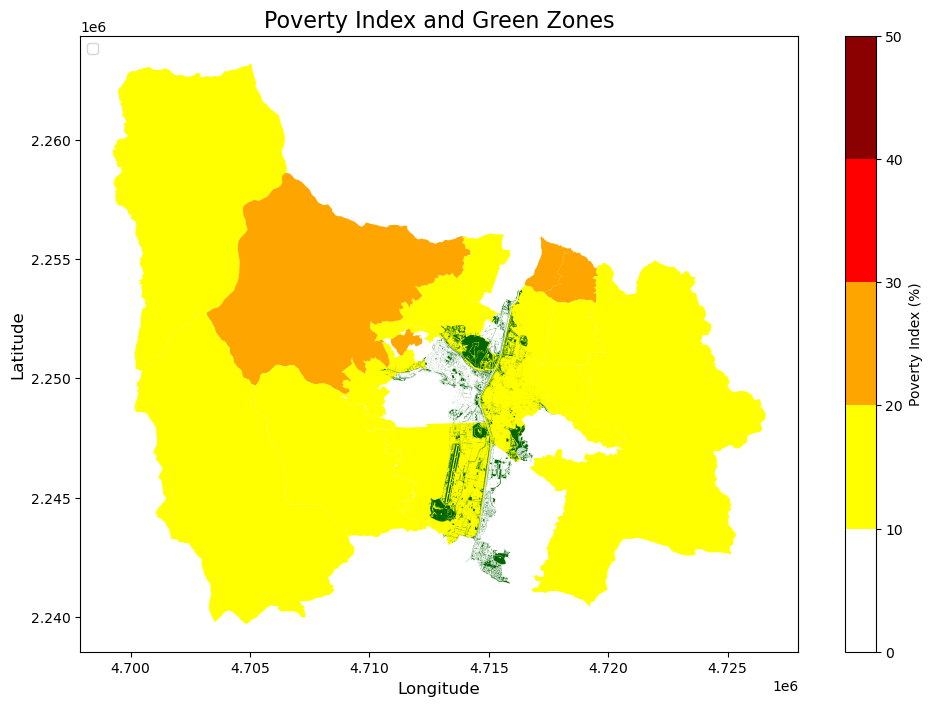

ValueError: Invalid RGBA argument: 'darkpurple'

ValueError: Invalid RGBA argument: 'darkpurple'

<Figure size 1200x800 with 2 Axes>

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define color mapping for human development index
hd_bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
hd_colors = ['lightgreen', 'green', 'yellow', 'orange', 'red']
hd_cmap = mcolors.ListedColormap(hd_colors)
hd_norm = mcolors.BoundaryNorm(hd_bins, hd_cmap.N)

# Define color mapping for multidimensional index
md_bins = [0, 50, 100, 150, 200, 250]
md_colors = ['lightblue', 'blue', 'cyan', 'teal', 'darkblue']
md_cmap = mcolors.ListedColormap(md_colors)
md_norm = mcolors.BoundaryNorm(md_bins, md_cmap.N)

# Define color mapping for poverty index
poverty_bins = [0, 10, 20, 30, 40, 50]
poverty_colors = ['white', 'yellow', 'orange', 'red', 'darkred']
poverty_cmap = mcolors.ListedColormap(poverty_colors)
poverty_norm = mcolors.BoundaryNorm(poverty_bins, poverty_cmap.N)

# Define color mapping for unemployment rate
unemp_bins = [0, 5, 10, 15, 20, 25]
unemp_colors = ['lightpink', 'pink', 'magenta', 'purple', 'darkpurple']
unemp_cmap = mcolors.ListedColormap(unemp_colors)
unemp_norm = mcolors.BoundaryNorm(unemp_bins, unemp_cmap.N)

# Plotting Human Development Index
fig, ax = plt.subplots(figsize=(12, 8))
human_dev_gdf.plot(ax=ax, column='human_dev_index', cmap=hd_cmap, norm=hd_norm, legend=True,
                  legend_kwds={'label': "Human Development Index"})
green_zones_data.plot(ax=ax, color='darkgreen', markersize=20, label='Green Zones')
ax.set_title("Human Development Index and Green Zones", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend(loc="upper left")
plt.show()

# Plotting Multidimensional Index
fig, ax = plt.subplots(figsize=(12, 8))
multidim_gdf.plot(ax=ax, column='multidim_index', cmap=md_cmap, norm=md_norm, legend=True,
                legend_kwds={'label': "Multidimensional Index"})
green_zones_data.plot(ax=ax, color='darkgreen', markersize=20, label='Green Zones')
ax.set_title("Multidimensional Index and Green Zones", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend(loc="upper left")
plt.show()

# Plotting Poverty Index
fig, ax = plt.subplots(figsize=(12, 8))
poverty_gdf.plot(ax=ax, column='poverty_index', cmap=poverty_cmap, norm=poverty_norm, legend=True,
               legend_kwds={'label': "Poverty Index (%)"})
green_zones_data.plot(ax=ax, color='darkgreen', markersize=20, label='Green Zones')
ax.set_title("Poverty Index and Green Zones", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend(loc="upper left")
plt.show()

# Plotting Unemployment Rate
fig, ax = plt.subplots(figsize=(12, 8))
unemployment_gdf.plot(ax=ax, column='unemployment_rate', cmap=unemp_cmap, norm=unemp_norm, legend=True,
                     legend_kwds={'label': "Unemployment Rate (%)"})
green_zones_data.plot(ax=ax, color='darkgreen', markersize=20, label='Green Zones')
ax.set_title("Unemployment Rate and Green Zones", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.legend(loc="upper left")
plt.show()

                    human_dev_index  multidim_index  poverty_index  \
human_dev_index            1.000000        0.954875      -0.834902   
multidim_index             0.954875        1.000000      -0.859221   
poverty_index             -0.834902       -0.859221       1.000000   
unemployment_rate         -0.801430       -0.708653       0.512017   
green_zones_nearby         0.689212        0.751596      -0.577160   

                    unemployment_rate  green_zones_nearby  
human_dev_index             -0.801430            0.689212  
multidim_index              -0.708653            0.751596  
poverty_index                0.512017           -0.577160  
unemployment_rate            1.000000           -0.415227  
green_zones_nearby          -0.415227            1.000000  


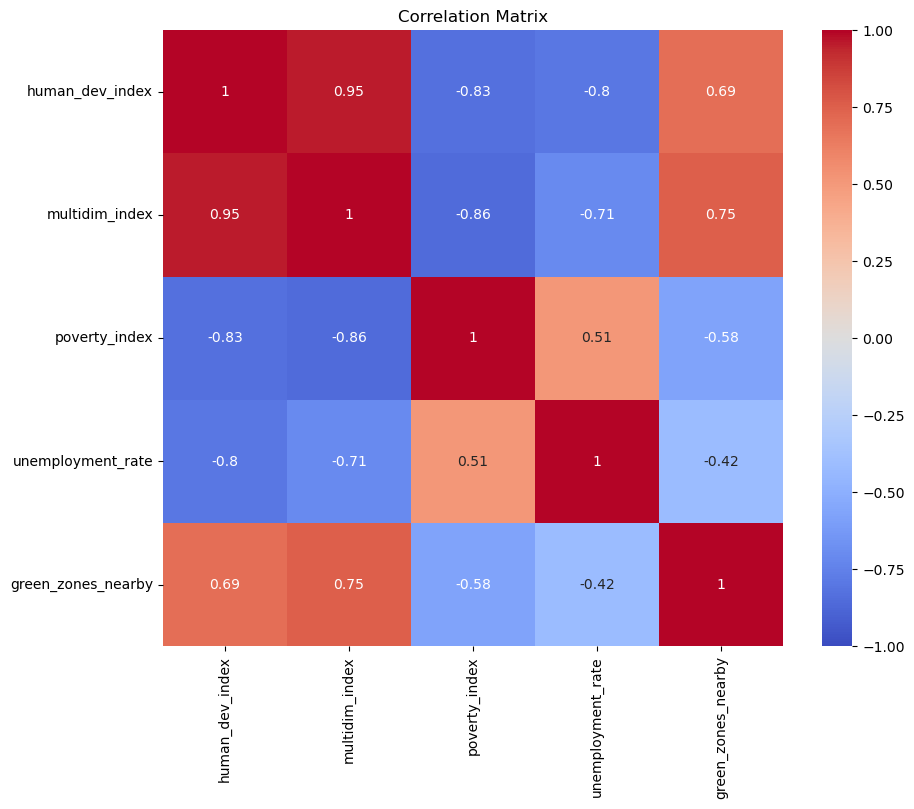

In [19]:
# Step 1: Define the proximity radius (in meters)
proximity_radius = 5000  # 5 kilometers

# Step 2: Function to calculate green zones nearby
def calculate_green_zones_nearby(index_gdf, green_zones_gdf, radius):
    # Ensure both GeoDataFrames use the same coordinate reference system
    green_zones_gdf = green_zones_gdf.to_crs(index_gdf.crs)
    
    # Create a buffer around each location
    index_gdf['geometry_buffer'] = index_gdf.geometry.buffer(radius)
    
    # Spatial join between buffers and green zones
    joined = gpd.sjoin(green_zones_gdf, index_gdf, how='left', predicate='within')
    
    # Count green zones per location
    green_counts = joined.groupby('index_right').size()
    
    # Assign counts to the index GeoDataFrame
    index_gdf['green_zones_nearby'] = index_gdf.index.map(green_counts).fillna(0).astype(int)
    
    # Drop the buffer geometry
    index_gdf = index_gdf.drop(columns='geometry_buffer')
    
    return index_gdf

# Step 3: Calculate green zones proximity for each index
human_dev_gdf = calculate_green_zones_nearby(gdfs["human_dev_index"], green_zones_data, proximity_radius)
multidim_gdf = calculate_green_zones_nearby(gdfs["multidim_index"], green_zones_data, proximity_radius)
poverty_gdf = calculate_green_zones_nearby(gdfs["poverty_index"], green_zones_data, proximity_radius)
unemployment_gdf = calculate_green_zones_nearby(gdfs["unemployment_rate"], green_zones_data, proximity_radius)

# Step 4: Ensure the necessary columns are present and rename if necessary
human_dev_gdf = human_dev_gdf.rename(columns={'i_2021': 'human_dev_index'})
multidim_gdf = multidim_gdf.rename(columns={'i_2021': 'multidim_index'})
poverty_gdf = poverty_gdf.rename(columns={'i_2021': 'poverty_index'})
unemployment_gdf = unemployment_gdf.rename(columns={'i_2021': 'unemployment_rate'})

# Ensure 'location_id' column exists (assuming 'nombre' is the identifier)
human_dev_gdf['location_id'] = human_dev_gdf['nombre']
multidim_gdf['location_id'] = multidim_gdf['nombre']
poverty_gdf['location_id'] = poverty_gdf['nombre']
unemployment_gdf['location_id'] = unemployment_gdf['nombre']

# Merge all datasets on a common identifier (assuming 'location_id' exists)
merged_df = human_dev_gdf[['location_id', 'human_dev_index', 'green_zones_nearby']].merge(
    multidim_gdf[['location_id', 'multidim_index']], on='location_id').merge(
    poverty_gdf[['location_id', 'poverty_index']], on='location_id').merge(
    unemployment_gdf[['location_id', 'unemployment_rate']], on='location_id')

# Step 5: Calculate correlation matrix
correlation_matrix = merged_df[['human_dev_index', 'multidim_index', 'poverty_index', 
                                'unemployment_rate', 'green_zones_nearby']].corr()

print(correlation_matrix)

# Step 6: Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [22]:
merged_df.to_csv('data_by_barrio.csv', index=False)

In [10]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from branca.element import Template, MacroElement

# Create a custom legend HTML template
legend_html = """
{% macro html(this, kwargs) %}
<div style="position: fixed; 
            bottom: 50px; left: 50px; width: 250px; height: 140px; 
            background-color: white; z-index:1000; border:2px solid grey; padding: 10px; font-size:14px;
            border-radius: 5px;">
    <b>Legend: Distance to Transport</b>
    <br>
    <i style="background:green; width:10px; height:10px; float:left; margin-right:8px;"></i>
    <span>0 - 100m</span><br>
    <i style="background:yellow; width:10px; height:10px; float:left; margin-right:8px;"></i>
    <span>101 - 500m</span><br>
    <i style="background:orange; width:10px; height:10px; float:left; margin-right:8px;"></i>
    <span>501 - 1000m</span><br>
    <i style="background:red; width:10px; height:10px; float:left; margin-right:8px;"></i>
    <span>1001m or more</span><br>
</div>
{% endmacro %}
"""

legend = MacroElement()
legend._template = Template(legend_html)

# Filter out rows with missing coordinates in both datasets
public_transport_data_cleaned = public_transport_data.dropna(subset=['latitud', 'longitud'])
tourism_data_cleaned = tourism_data.dropna(subset=['latitud', 'longitud', 'distance_to_transport'])

# Add a heatmap layer for public transport stops
heatmap_data = public_transport_data_cleaned[["latitud", "longitud"]].dropna().to_numpy().tolist()

# Define a new gradient transitioning from dark pure blue to light grayish blue
improved_gradient = {0.2: 'darkblue', 0.5: 'blue', 0.9: 'lightblue'}

# Initialize a new Folium map centered on Medellín
m = folium.Map(location=[6.2442, -75.5812], zoom_start=13, tiles="CartoDB Positron")
m.get_root().add_child(legend)

# Add tourist attractions with color-coded markers based on distance to transport
for _, row in tourism_data_cleaned.iterrows():
    # Determine marker color based on distance
    distance = row['distance_to_transport']
    if distance <= 0.001:
        color = 'green'
    elif distance <= 0.005:
        color = 'yellow'
    elif distance <= 0.01:
        color = 'orange'
    else:
        color = 'red'

    # Add the marker to the map
    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=6,
        color=color,
        fill=True,
        fill_opacity=0.9,
        popup=f"<b>{row['nombre_sitio']}</b><br>Distance to transport: {distance:.4f} degrees"
    ).add_to(m)

# Add the legend to the map
m.get_root().add_child(legend)

# Update the heatmap to show finer details at higher zoom levels
HeatMap(
    heatmap_data,
    radius=10,  # Further reduce the radius for more fine-grained details
    blur=5,  # Lower the blur for sharper details
    gradient=improved_gradient,  # Use the improved gradient
    max_zoom=20,  # Allow very fine detail at higher zoom levels
    min_opacity=0.3,  # Keep minimum opacity low for subtlety
    name="Transport Density"
).add_to(m)

# Save and display the updated map with fine details at higher zoom levels
map_path_fine_details_heatmap = "../medellin_tourism_accessibility_final.html"
m.save(map_path_fine_details_heatmap)
map_path_fine_details_heatmap

# Save the cleaned tourism data with distances to a CSV file
tourism_data_cleaned[["nombre_sitio", "latitud", "longitud", "distance_to_transport"]].to_csv("../data/cleaned_tourism_data.csv", index=False)

# Save the cleaned public transport data to a CSV file
public_transport_data_cleaned[["id_parada", "latitud", "longitud"]].to_csv("../data/cleaned_public_transport_data.csv", index=False)

In [9]:
public_transport_data_cleaned

,OBJECTID,Shape,id_paradero,id_parada,id_ruta,nro_parada,direccion,tipo_parada,recorrido,codigo_ruta,nombre_ruta,sistema_ruta,tipo_ruta,empresa,longitud,latitud,x_origen_nacional,y_origen_nacional,geometry
0,1,None,51330,90001052,90001,52,"CR 81 34A-138, Medellin",Reglamentaria,Destino-Origen,303,Circular derecha 303,Circular Derecha 303,Circular,Coonatra,-75.602661,6.242448,4.712113e+06,2.248490e+06,POINT (4712112.686 2248490.219)
1,2,None,52238,90001036,90001,36,"CR 50FF x CL 6, Medellin",Reglamentaria,Destino-Origen,303,Circular derecha 303,Circular Derecha 303,Circular,Coonatra,-75.584005,6.201846,4.714156e+06,2.243989e+06,POINT (4714155.726 2243989.051)
2,3,None,51585,90001041,90001,41,"CL 8 x CR 75 , Medellin",Reglamentaria,Destino-Origen,303,Circular derecha 303,Circular Derecha 303,Circular,Coonatra,-75.598550,6.218091,4.712554e+06,2.245794e+06,POINT (4712554.411 2245793.781)
3,4,None,51488,90001046,90001,46,"CR 80 20A-22, Medellin",Reglamentaria,Destino-Origen,303,Circular derecha 303,Circular Derecha 303,Circular,Coonatra,-75.600120,6.225722,4.712385e+06,2.246639e+06,POINT (4712384.835 2246638.685)
4,5,None,52673,90001030,90001,30,"CL 10 48-85, Medellin",Reglamentaria,Destino-Origen,303,Circular derecha 303,Circular Derecha 303,Circular,Coonatra,-75.576500,6.212103,4.714992e+06,2.245120e+06,POINT (4714991.944 2245119.543)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10080,10081,None,51298,90374043,90374,43,"CR 81B 19B-45, Medellin",Reglamentaria,Destino-Origen,172-178 FUSION,Belen la Gloria,3A,Directa Centro,Cootrabel,-75.603186,6.225943,4.712046e+06,2.246665e+06,POINT (4712045.539 2246664.826)
10081,10082,None,51834,90374036,90374,36,"DG 74B 32D-25, Medellin",Reglamentaria,Destino-Origen,172-178 FUSION,Belen la Gloria,3A,Directa Centro,Cootrabel,-75.592836,6.236481,4.713197e+06,2.247825e+06,POINT (4713196.957 2247824.806)
10082,10083,None,51678,90374040,90374,40,"CR 76 x CL 25 , Medellin",Reglamentaria,Destino-Origen,172-178 FUSION,Belen la Gloria,3A,Directa Centro,Cootrabel,-75.596726,6.227536,4.712762e+06,2.246838e+06,POINT (4712761.53 2246837.557)
10083,10084,None,51437,90374011,90374,11,"DG 80 con 7, Medellin",Reglamentaria,Origen-Destino,172-178 FUSION,Belen la Gloria,3A,Directa Centro,Cootrabel,-75.601089,6.219890,4.712274e+06,2.245994e+06,POINT (4712274.317 2245994.115)


In [15]:
import json
import pandas as pd

# Function to parse GeoJSON as raw JSON and extract properties
def parse_geojson_as_json(path):
    try:
        with open(path, "r") as f:
            data = json.load(f)
        # Extract the properties from features
        properties = [feature["properties"] for feature in data["features"]]
        return pd.DataFrame(properties)
    except Exception as e:
        return f"Error parsing JSON: {e}"

# Parse the problematic datasets
datasets_parsed = {
    "human_dev_index": parse_geojson_as_json(files["human_dev_index"]),
    "multidim_index": parse_geojson_as_json(files["multidim_index"]),
    "poverty_index": parse_geojson_as_json(files["poverty_index"]),
    "unemployment_rate": parse_geojson_as_json(files["unemployment_rate"]),
    "green_zones": parse_geojson_as_json(files["green_zones"]),
}

# Display the structure of the parsed datasets
datasets_parsed_summaries = {key: df.head() if isinstance(df, pd.DataFrame) else df for key, df in datasets_parsed.items()}
datasets_parsed_summaries

{'human_dev_index':    OBJECTID codigo      nombre  i_2014  i_2015  i_2016  i_2017  i_2018  \
 0         1     01     Popular    0.57    0.64    0.58    0.58    0.58   
 1         2     02  Santa Cruz    0.58    0.65    0.60    0.60    0.60   
 2         3     03    Manrique    0.61    0.68    0.61    0.62    0.62   
 3         4     04    Aranjuez    0.65    0.70    0.64    0.66    0.68   
 4         5     05    Castilla    0.67    0.72    0.69    0.66    0.73   
 
    i_2019  i_2020  i_2021 i_2022 i_2023  Shape_Length    Shape_Area  
 0    0.57    0.56    0.61   None   None   9604.448562  3.097941e+06  
 1    0.62    0.57    0.64   None   None   8597.294374  2.195663e+06  
 2    0.62    0.57    0.64   None   None  12077.559132  5.096182e+06  
 3    0.70    0.67    0.68   None   None   9642.676543  4.883314e+06  
 4    0.75    0.61    0.70   None   None  16098.032108  6.063916e+06  ,
 'multidim_index':    OBJECTID codigo      nombre  i_2014  i_2015  i_2016  i_2017  i_2018  \
 0       

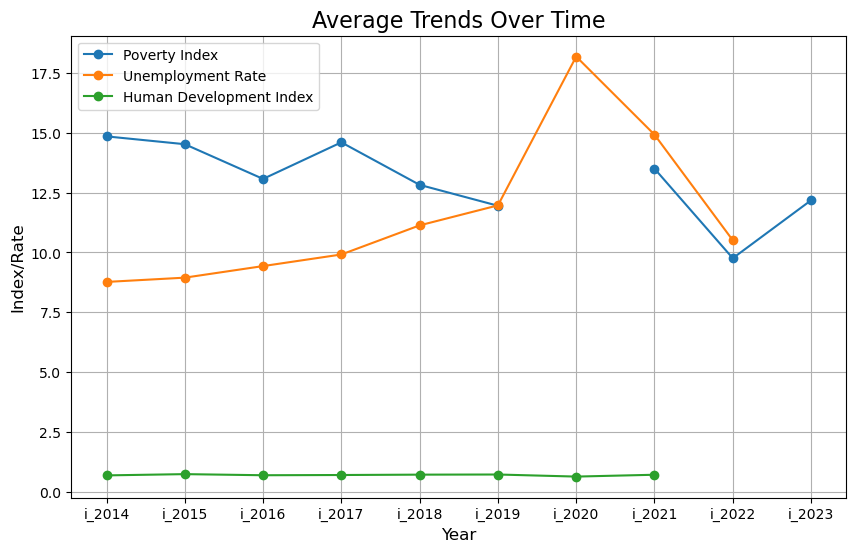

In [16]:
import matplotlib.pyplot as plt

# Extract relevant datasets
poverty_data = datasets_parsed["poverty_index"]
unemployment_data = datasets_parsed["unemployment_rate"]
human_dev_data = datasets_parsed["human_dev_index"]

# Average metrics over time for all regions
poverty_avg = poverty_data.loc[:, "i_2014":"i_2023"].mean()
unemployment_avg = unemployment_data.loc[:, "i_2014":"i_2023"].mean()
human_dev_avg = human_dev_data.loc[:, "i_2014":"i_2023"].mean()

# Plot trends over time
plt.figure(figsize=(10, 6))
plt.plot(poverty_avg.index, poverty_avg.values, label="Poverty Index", marker='o')
plt.plot(unemployment_avg.index, unemployment_avg.values, label="Unemployment Rate", marker='o')
plt.plot(human_dev_avg.index, human_dev_avg.values, label="Human Development Index", marker='o')
plt.title("Average Trends Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Index/Rate", fontsize=12)
plt.legend()
plt.grid()
plt.show()

In [17]:
# Calculate correlations between Poverty Index, Unemployment Rate, and HDI (across all regions)
correlation_df = pd.DataFrame({
    "Poverty Index": poverty_data.loc[:, "i_2014":"i_2023"].mean(),
    "Unemployment Rate": unemployment_data.loc[:, "i_2014":"i_2023"].mean(),
    "Human Development Index": human_dev_data.loc[:, "i_2014":"i_2023"].mean()
})

# Calculate and display correlation matrix
correlation_matrix = correlation_df.corr()

correlation_matrix

,Poverty Index,Unemployment Rate,Human Development Index
Poverty Index,1.000000,-0.260961,-0.247877
Unemployment Rate,-0.260961,1.000000,-0.590191
Human Development Index,-0.247877,-0.590191,1.000000


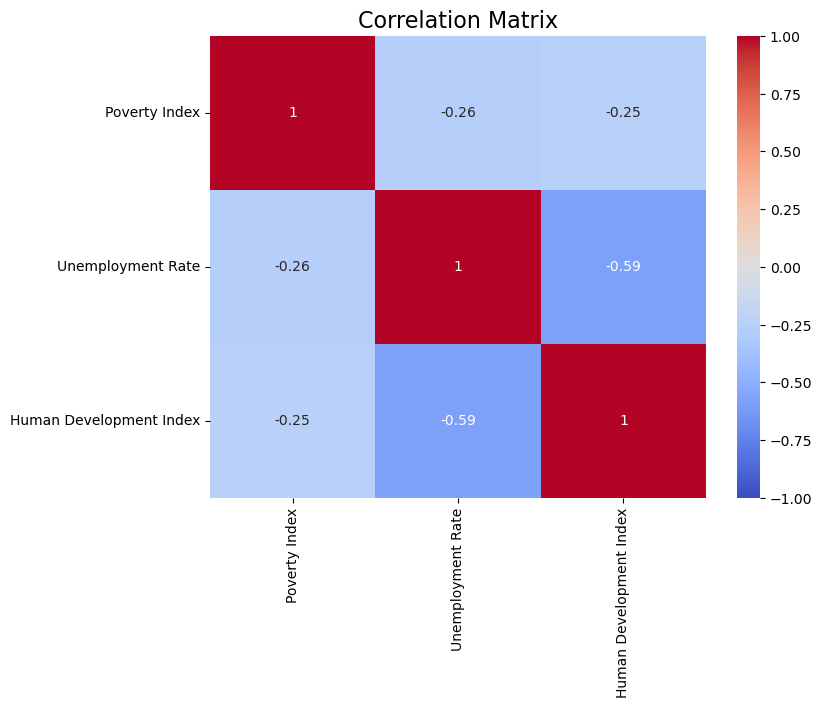

In [19]:
# plot correlation matrix as a heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

**Key Findings:**

- **Poverty Index and Unemployment Rate:** A weak negative correlation suggests that regions with lower poverty do not necessarily have significantly lower unemployment.
- **Poverty Index and HDI:** A weak negative correlation indicates that higher HDI slightly correlates with reduced poverty.
- **Unemployment Rate and HDI**: A moderate negative correlation shows that higher HDI correlates with lower unemployment, aligning with the goals of SDG 8 (Decent Work and Economic Growth).

In [20]:
# Rank regions by HDI, Poverty, and Unemployment (latest year available: i_2021)
regional_disparities = pd.DataFrame({
    "Region": human_dev_data["nombre"],
    "HDI": human_dev_data["i_2021"],
    "Poverty Index": poverty_data["i_2021"],
    "Unemployment Rate": unemployment_data["i_2021"]
})

# Rank regions for each metric
regional_disparities["HDI Rank"] = regional_disparities["HDI"].rank(ascending=False)
regional_disparities["Poverty Rank"] = regional_disparities["Poverty Index"].rank(ascending=True)
regional_disparities["Unemployment Rank"] = regional_disparities["Unemployment Rate"].rank(ascending=True)

# Highlight top-performing and underperforming regions
regional_summary = regional_disparities.sort_values("HDI Rank")

regional_summary.head(), regional_summary.tail()

(              Region   HDI  Poverty Index  Unemployment Rate  HDI Rank  \
 13        El Poblado  0.87           2.97               5.83       1.0   
 10  Laureles Estadio  0.81           4.85              10.26       2.0   
 11        La América  0.80           4.92              11.47       3.0   
 14          Guayabal  0.74          11.10              14.56       4.0   
 15             Belén  0.73          11.52              14.38       5.5   
 
     Poverty Rank  Unemployment Rank  
 13           1.0                1.0  
 10           2.0                2.0  
 11           3.0                4.0  
 14           7.0               10.0  
 15          10.0                9.0  ,
            Region   HDI  Poverty Index  Unemployment Rate  HDI Rank  \
 7   Villa Hermosa  0.65          16.29              17.73      17.0   
 2        Manrique  0.64          16.23              20.94      18.5   
 1      Santa Cruz  0.64          21.63              19.63      18.5   
 17  San Cristóbal  0.63 

In [ ]:
# Extract and analyze multidimensional index data
multidimensional_data = datasets_parsed["multidim_index"]

# Select latest year (2021) and compare with poverty and HDI
multidimensional_comparison = pd.DataFrame({
    "Region": multidimensional_data["nombre"],
    "Multidimensional Index": multidimensional_data["i_2021"],
    "Poverty Index": poverty_data["i_2021"],
    "HDI": human_dev_data["i_2021"]
})

# Correlation analysis between multidimensional index, poverty, and HDI
multidimensional_correlation = multidimensional_comparison[multidimensional_comparison.columns[1:]].corr()

multidimensional_comparison.sort_values("Multidimensional Index", ascending=False).head()

,Region,Multidimensional Index,Poverty Index,HDI
13,El Poblado,72.29,2.97,0.87
10,Laureles Estadio,66.22,4.85,0.81
11,La América,59.83,4.92,0.80
15,Belén,52.74,11.52,0.73
9,La Candelaria,52.63,11.11,0.73


In [26]:
multidimensional_comparison.sort_values("Multidimensional Index", ascending=True).head()

,Region,Multidimensional Index,Poverty Index,HDI
0,Popular,32.49,25.24,0.61
1,Santa Cruz,34.97,21.63,0.64
16,San Sebastián de Palmitas,36.16,19.24,0.69
2,Manrique,36.24,16.23,0.64
7,Villa Hermosa,37.02,16.29,0.65
